In [48]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


# 1 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

-> For Multiplications:
Let A and B be the two matrix that needs to be Multiplied and their dimensions are NxK and KxM Respectively.
Now, we take each all elements from row(K) of A and all elements from column(K) of B; and multiply them For N*M times.
Therefore,
Number of multiplications required = N*M*K

-> For Additions:
We similarly have matrices A and B.
Now to calculate number of Additions, we know that we do addition of those multiplied K terms; so we perform (K-1) additions.
Hence, 
Number of addition required = N*M*(K-1)

# 2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [49]:

import time
import random
import numpy as np

# Function to multiply two matrices using list of lists Method.
def matrix_multiply_list(A, B):  # Assuming A and B has DImension NxK and KxM respectively
    n = len(A)     
    k = len(A[0])
    m = len(B[0])
    
    # Result Matrix stored in C.
    C = [[0 for _ in range(m)] for _ in range(n)]
    
    # Perform matrix multiplication
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]
                
    return C

# Function to multiply two matrices using numpy Method.
def matrix_multiply_numpy(A, B):
    C_np = np.dot(A, B)
    return
    

# Main Exexution~

n, k, m = 120, 200, 160   # Here, A[n, k] and B[k, m]
A = [[random.random() for _ in range(k)] for _ in range(n)]
B = [[random.random() for _ in range(m)] for _ in range(k)]


# For list of lists Method
start_time = time.time()
C_list = matrix_multiply_list(A, B)
end_time = time.time()
list_time = end_time - start_time
print(f"Time taken for list of lists multiplication method= {list_time:.6f} seconds")


# For numpy Method
start_time = time.time()
C_np = matrix_multiply_numpy(A, B)
end_time = time.time()
numpy_time = end_time - start_time
print(f"Time taken for NumPy multiplication= {numpy_time:.6f} seconds")


Time taken for list of lists multiplication method= 0.348813 seconds
Time taken for NumPy multiplication= 0.003001 seconds


# Reason
=> List of Lists method is always slower because NumPy is arkitectured to perform operation on entire array at once using SIMD (Single Instruction, 
   Multiple Data instruction),  wherea for list done one element at a time.

# 3 Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

-> Calculating Time Complexity for Reapeted find max method to find Median:
we know that Finding 1st Highest element requires to check of every element N, Hence it takes - O(N)

Now, for 2nd Highest we will require last search and (n-1) search on the array. Therefore, it takes N + (N-1) passes
which is, O(N + N -1) = O(2N - 1) = O(N)

To find median Kth (which is n/2th term) element we will require,
Sum of passes from 1 to ceil of n/2th terms = (n/2)(n/2 + 1)/2 = (n^2 + n + 2)/8
Hence, O((n^2 + n + 2)/8) = O(N^2/8) = O(N^2).


-> Better method can be QuickSelect algorithm (similar to QuickSort),
It takes O(N) as average time complexity, still having worst case at O(N^2)

In [50]:

import time
import random
import numpy as np


## REAPEATED PASSES METHOD
# utility to find kth largest element
def find_kth_largest_element(arr, k):
    for _ in range(k):
        max_elem = max(arr)
        arr.remove(max_elem)
    return max_elem

# main function to find median in an array
def find_median_repeated_passes(arr):
    n = len(arr)
    if n % 2 == 1: # if Odd
        return find_kth_largest_element(arr.copy(), (n // 2) + 1)
    else: # if Even
        mid1 = find_kth_largest_element(arr.copy(), n // 2)
        mid2 = find_kth_largest_element(arr.copy(), (n // 2) + 1)
        return (mid1 + mid2) / 2




## Quickselect Method
# utility to find kth largest element
def quickselect(arr, k):
    if len(arr) == 1:
        return arr[0]

    pivot = random.choice(arr)
    lows = [el for el in arr if el < pivot]
    highs = [el for el in arr if el > pivot]
    pivots = [el for el in arr if el == pivot]

    if k < len(lows):
        return quickselect(lows, k)
    elif k < len(lows) + len(pivots):
        return pivots[0]
    else:
        return quickselect(highs, k - len(lows) - len(pivots))


def find_median_quickselect(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, n // 2)
    else:
        mid1 = quickselect(arr, n // 2 - 1)
        mid2 = quickselect(arr, n // 2)
        return (mid1 + mid2) / 2






## MAIN EXECUTION~

arr = [random.random() for _ in range(2000)]

start_time = time.time()
median_repeated_passes = find_median_repeated_passes(arr)
end_time = time.time()
repeated_passes_time = end_time - start_time
print(f"Median (repeated passes method)= {median_repeated_passes}")
print(f"Time taken for repeated passes method: {repeated_passes_time:.6f} seconds \n")


start_time = time.time()
median_quickselect = find_median_quickselect(arr)
end_time = time.time()
quickselect_time = end_time - start_time
print(f"Median (Quickselect method)= {median_quickselect}")
print(f"Time taken for Quickselect method: {quickselect_time:.6f} seconds \n")


## NumPy median Method
start_time = time.time()
median_numpy = np.median(arr)
end_time = time.time()
numpy_time = end_time - start_time
print(f"Median (NumPy): {median_numpy}")
print(f"Time taken for NumPy median: {numpy_time:.6f} seconds")



Median (repeated passes method)= 0.487957194167894
Time taken for repeated passes method: 0.034998 seconds 

Median (Quickselect method)= 0.487957194167894
Time taken for Quickselect method: 0.001004 seconds 

Median (NumPy): 0.487957194167894
Time taken for NumPy median: 0.000998 seconds


# 4 What is the gradient of the following function with respect to x and y?
#    x^2.y + y^3.sin(x)

-> To find gradient of the function with respect to x and y, we just need to perform partial derivatives with respect to each variable.
That is for function f(x,y), gradient is ∇f = (df/dx, df/dy).
{here, d/dx and d/dy is partial derivative notations}

Let f = x^2.y + y^3.sin(x)

Therefore, 
 df/dx = 2xy + y^3.cos(x)
And,
 df/dy = x^2 + 3y^2.sin(x)


Hence, 
    ∇f = (x^2.y + y^3.sin(x), x^2 + 3y^2.sin(x))

# 5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y



In [51]:
# %pip install jax jaxlib

In [52]:
# Install JAX if not already installed
# %pip install jax jaxlib

import jax.numpy as jnp
from jax import grad


# Define the given function 
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)


# Compute the gradient using JAX library
grad_f = grad(f, (0, 1))


# Analytical gradients
def analytical_gradient(x, y):
    df_dx = 2*x*y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3*y**2 * jnp.sin(x)
    return df_dx, df_dy



# Test the gradients at a few random values
x_values = [0.5, 1.0, -1.0]
y_values = [2.0, 1.5, -0.5]

for x, y in zip(x_values, y_values):
    jax_grad = grad_f(x, y)
    analytical = analytical_gradient(x, y)
    print(f"x = {x}, y = {y}")
    print(f"JAX Gradient: {jax_grad}")
    print(f"Analytical Gradient: {analytical} \n")


x = 0.5, y = 2.0
JAX Gradient: (Array(9.02066, dtype=float32, weak_type=True), Array(6.0031066, dtype=float32, weak_type=True))
Analytical Gradient: (Array(9.02066, dtype=float32, weak_type=True), Array(6.0031066, dtype=float32, weak_type=True)) 

x = 1.0, y = 1.5
JAX Gradient: (Array(4.82352, dtype=float32, weak_type=True), Array(6.679929, dtype=float32, weak_type=True))
Analytical Gradient: (Array(4.82352, dtype=float32, weak_type=True), Array(6.679929, dtype=float32, weak_type=True)) 

x = -1.0, y = -0.5
JAX Gradient: (Array(0.9324622, dtype=float32, weak_type=True), Array(0.36889678, dtype=float32, weak_type=True))
Analytical Gradient: (Array(0.9324622, dtype=float32, weak_type=True), Array(0.36889678, dtype=float32, weak_type=True)) 



# 6 Use sympy to confirm that you obtain the same gradient analytically.

In [53]:
# %pip install sympy

In [54]:
import sympy as sp

# Defining the symbolic variables
x, y = sp.symbols('x y')

# The given function
f = x**2 * y + y**3 * sp.sin(x)

# Compute the partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Display the gradients
df_dx, df_dy

(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))

# 7 Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
    Branch 1
        Roll Number: 1, Name: N, Marks:
            Maths: 100, English: 70 …
    Branch 2

2023
    Branch 1
    Branch 2

2024
    Branch 1
    Branch 2

2025
    Branch 1
    Branch 2

In [55]:
# Function to add student records in the given order
def add_student_record(student_records, year, branch, roll_number, name, marks):
    if year not in student_records:
        student_records[year] = {}
    if branch not in student_records[year]:
        student_records[year][branch] = {}
    student_records[year][branch][roll_number] = {
        "Name": name,
        "Marks": marks
    }


# Initialize an empty dictionary for student records
student_records = {}

# Example data entry
add_student_record(student_records, 2022, "Branch 1", 1, "Alice", {"Maths": 95, "English": 88, "Science": 92})
add_student_record(student_records, 2022, "Branch 1", 2, "Bob", {"Maths": 85, "English": 79, "Science": 80})
add_student_record(student_records, 2022, "Branch 2", 1, "Charlie", {"Maths": 90, "English": 85, "Science": 88})

# Print inidividual record
print(student_records[2022]["Branch 1"][1]["Marks"]["Maths"])

# Print the All student records dictionary
print(student_records)

95
{2022: {'Branch 1': {1: {'Name': 'Alice', 'Marks': {'Maths': 95, 'English': 88, 'Science': 92}}, 2: {'Name': 'Bob', 'Marks': {'Maths': 85, 'English': 79, 'Science': 80}}}, 'Branch 2': {1: {'Name': 'Charlie', 'Marks': {'Maths': 90, 'English': 85, 'Science': 88}}}}}


# 8 Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [56]:
# Student{ RollNumber, Name, Marks{} }
# Branch { BranchName, Student[] }
# Year { Branch[] }
# Database { Year[] }


class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks  # marks is a dictionary with subject names as keys and marks as values

    def __repr__(self):
        return f"Student(roll_number={self.roll_number}, name='{self.name}', marks={self.marks})"


class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(branch_name='{self.branch_name}', students={self.students})"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(year={self.year}, branches={self.branches})"


class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database(years={self.years})"



# Execution~
database = Database()


# Creating years 
year_2022 = Year(2022)
year_2023 = Year(2023)


# Create branches for 2022
branch_1_2022 = Branch("Branch 1")
branch_2_2022 = Branch("Branch 2")
# Create students for 2022
student_1 = Student(1, "Alice", {"Maths": 95, "English": 88, "Science": 92})
student_2 = Student(2, "Bob", {"Maths": 85, "English": 79, "Science": 80})


# Add students to branches
branch_1_2022.add_student(student_1)
branch_1_2022.add_student(student_2)
# Add branches to years
year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)


# Add years to database
database.add_year(year_2022)
database.add_year(year_2023)


# Printing the entire database
print(database)

Database(years=[Year(year=2022, branches=[Branch(branch_name='Branch 1', students=[Student(roll_number=1, name='Alice', marks={'Maths': 95, 'English': 88, 'Science': 92}), Student(roll_number=2, name='Bob', marks={'Maths': 85, 'English': 79, 'Science': 80})]), Branch(branch_name='Branch 2', students=[])]), Year(year=2023, branches=[])])


# 9 Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
y = x
y = x^2
y = x^3/100
y = sin(x)
y = sin(x)/x
y = log(x)
y = e^x

In [57]:
# %pip install matplotlib

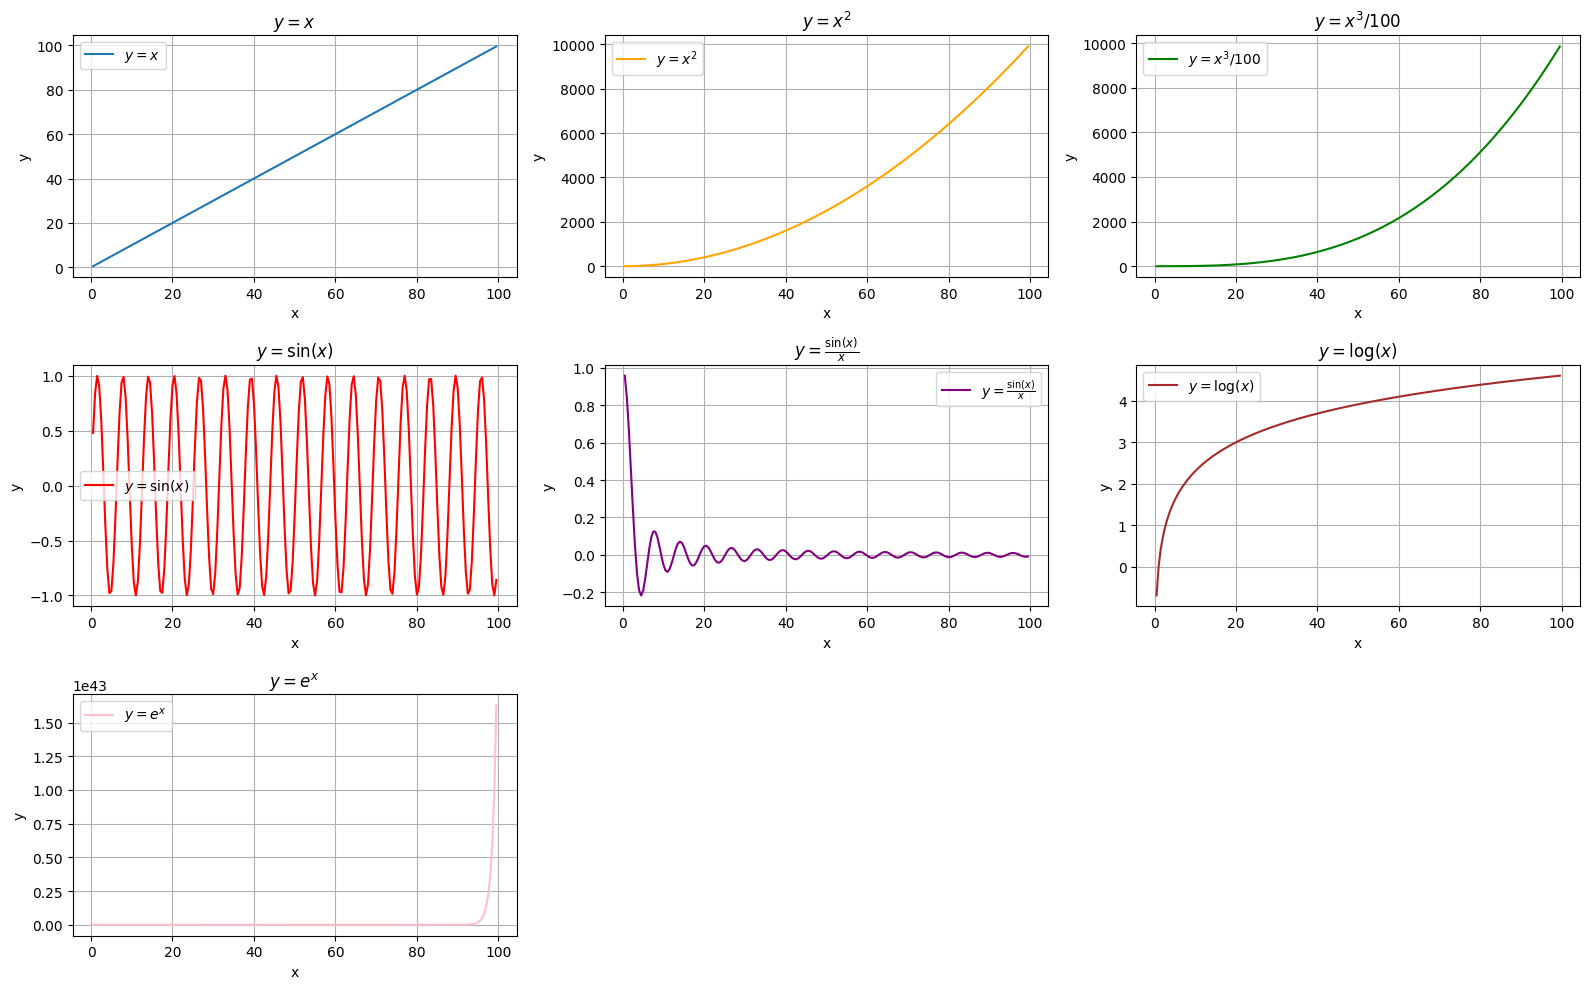

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x = np.arange(0.5, 100.0, 0.5)

# Define the functions
y1 = x
y2 = x**2
y3 = (x**3) / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Create a plot
plt.figure(figsize=(16, 10))

# Plot each function
plt.subplot(3, 3, 1)
plt.plot(x, y1, label=r'$y = x$')
plt.title(r'$y = x$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 2)
plt.plot(x, y2, label=r'$y = x^2$', color='orange')
plt.title(r'$y = x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 3)
plt.plot(x, y3, label=r'$y = x^3/100$', color='green')
plt.title(r'$y = x^3/100$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 4)
plt.plot(x, y4, label=r'$y = \sin(x)$', color='red')
plt.title(r'$y = \sin(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 5)
plt.plot(x, y5, label=r'$y = \frac{\sin(x)}{x}$', color='purple')
plt.title(r'$y = \frac{\sin(x)}{x}$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 6)
plt.plot(x, y6, label=r'$y = \log(x)$', color='brown')
plt.title(r'$y = \log(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(3, 3, 7)
plt.plot(x, y7, label=r'$y = e^x$', color='pink')
plt.title(r'$y = e^x$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.tight_layout()

# Show the plot
plt.show()


# 10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [59]:
# %pip install pandas

In [60]:
import numpy as np
import pandas as pd

# Generate a matrix of size 20x5 with random numbers drawn uniformly from the range [1, 2)
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame from the matrix
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

# Find the column with the highest standard deviation
std_devs = df.std()
highest_std_column = std_devs.idxmax()

# Find the row with the lowest mean
row_means = df.mean(axis=1)
lowest_mean_row = row_means.idxmin()

# Display results
print("DataFrame:")
print(df)
print("\nColumn with the highest standard deviation:", highest_std_column)
print("Row with the lowest mean:", lowest_mean_row)


DataFrame:
           a         b         c         d         e
0   1.813888  1.837791  1.349341  1.952961  1.524456
1   1.098146  1.157935  1.265270  1.758485  1.044301
2   1.631491  1.791265  1.699632  1.241012  1.011711
3   1.792926  1.839330  1.205441  1.949663  1.733934
4   1.928879  1.464340  1.864695  1.368496  1.375749
5   1.358083  1.165916  1.862644  1.002204  1.104821
6   1.335809  1.490454  1.078750  1.173515  1.478875
7   1.873659  1.965456  1.157313  1.885727  1.504885
8   1.792083  1.942503  1.552857  1.954292  1.026573
9   1.798679  1.140823  1.869996  1.456306  1.579041
10  1.871766  1.288259  1.332363  1.996410  1.059288
11  1.391282  1.147452  1.241977  1.387758  1.819493
12  1.788107  1.997945  1.146194  1.838156  1.904397
13  1.480503  1.751516  1.113008  1.062093  1.807540
14  1.033871  1.769331  1.612622  1.763039  1.328546
15  1.126104  1.427148  1.060450  1.516692  1.122085
16  1.010339  1.551289  1.502894  1.857040  1.169158
17  1.985601  1.318966  1.117133  1

# 11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [61]:
# Add column 'f' which is the sum of columns 'a', 'b', 'c', 'd', 'e'
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Create column 'g' based on the value of column 'f'
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where column 'g' is 'LT8'
num_LT8_rows = (df['g'] == 'LT8').sum()

# Calculate the standard deviation of column 'f' for rows where 'g' is 'LT8'
std_LT8 = df[df['g'] == 'LT8']['f'].std()

# Calculate the standard deviation of column 'f' for rows where 'g' is 'GT8'
std_GT8 = df[df['g'] == 'GT8']['f'].std()

# Display results
print("DataFrame:")
print(df)

print("\nNumber of rows where 'g' is 'LT8':", num_LT8_rows)
print("Standard deviation of 'f' where 'g' is 'LT8':", std_LT8)
print("Standard deviation of 'f' where 'g' is 'GT8':", std_GT8)



DataFrame:
           a         b         c         d         e         f    g
0   1.813888  1.837791  1.349341  1.952961  1.524456  8.478437  GT8
1   1.098146  1.157935  1.265270  1.758485  1.044301  6.324137  LT8
2   1.631491  1.791265  1.699632  1.241012  1.011711  7.375112  LT8
3   1.792926  1.839330  1.205441  1.949663  1.733934  8.521294  GT8
4   1.928879  1.464340  1.864695  1.368496  1.375749  8.002159  GT8
5   1.358083  1.165916  1.862644  1.002204  1.104821  6.493667  LT8
6   1.335809  1.490454  1.078750  1.173515  1.478875  6.557403  LT8
7   1.873659  1.965456  1.157313  1.885727  1.504885  8.387041  GT8
8   1.792083  1.942503  1.552857  1.954292  1.026573  8.268308  GT8
9   1.798679  1.140823  1.869996  1.456306  1.579041  7.844845  LT8
10  1.871766  1.288259  1.332363  1.996410  1.059288  7.548085  LT8
11  1.391282  1.147452  1.241977  1.387758  1.819493  6.987962  LT8
12  1.788107  1.997945  1.146194  1.838156  1.904397  8.674799  GT8
13  1.480503  1.751516  1.113008  1.0

# 12 Write a small piece of code to explain broadcasting in numpy.

Broadcasting in NumPy describes how NumPy treats arrays with different shapes by making use of arithmetic operations. A function in NumPy which  provides a means of vectorizing array operations. It simplifies code and avoids the need for explicit looping and performs the operation directly with following some rules.


Broadcasting rules are:
    -If the arrays have a different number of dimensions, pad the smaller array's shape with ones on the left side.
    -The dimensions of the two arrays are compared element-wise. They must either be the same or one of them must be 1.
    -If these conditions are satisfied, the arrays are broadcast to a common shape.

In [62]:
# Demonstration:

# Create some N-D array
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])

# Create a 1D array
vector = np.array([10, 20, 30])

# Adding Both arrays
result = matrix + vector

print("Matrix:")
print(matrix)
print("\nVector:")
print(vector)
print("\nResult of broadcasting (Matrix + Vector):")
print(result)

Matrix:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Vector:
[10 20 30]

Result of broadcasting (Matrix + Vector):
[[11 22 33]
 [14 25 36]
 [17 28 39]
 [20 31 42]]


# 13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [63]:
import numpy as np

def cust_argmin(array):
    """Compute the index of the minimum element in a NumPy array."""
    # Check if the array is empty
    if array.size == 0:
        #print("The input array is empty!")
        return 0
    
    # Initialize index of the minimum value
    min_index = 0
    min_value = array[0]
    
    # Iterate through the array to find the minimum value and its index
    for i in range(1, array.size):
        if array[i] < min_value:
            min_value = array[i]
            min_index = i
    
    return min_index


# MAIN EXECUTION~
array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5])
print("Array:", array)

custom_index = cust_argmin(array)
print("Index of minimum element (custom function):", custom_index)

numpy_index = np.argmin(array)
print("Index of minimum element (np.argmin function):", numpy_index)


Array: [3 1 4 1 5 9 2 6 5]
Index of minimum element (custom function): 1
Index of minimum element (np.argmin function): 1


In [65]:
# %pip install jupyter
# %pip install nbconvert
!jupyter nbconvert --to html ML_PreReqi.ipynb

[NbConvertApp] Converting notebook ML_PreReqi.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 536669 bytes to ML_PreReqi.html
